# Fundamentals of NLP with Tensorflow

> NLP has the goal of deriving information out of natural languages(could be sequences, texts or speech).

> Another common term for NLP problems is sequences to sequence problems(seq2seq)

## Importing helper functions

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py

--2022-08-21 12:51:27--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19296 (19K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  18.84K  --.-KB/s    in 0.001s  

2022-08-21 12:51:28 (16.9 MB/s) - ‘helper_functions.py’ saved [19296/19296]



In [2]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys, create_data_augmented_layer_for_model, load_and_prep_image, make_confusion_matrix, make_confusion_matrix_for_larger_dataset

## Getting the dataset

> The dataset we are using is the Kaggle's introductionn to NLP dataset(text samples of Tweet labelled as disaster or not disaster).

This is the link of the dataset -> [Kaggle Dataset](https://www.kaggle.com/competitions/nlp-getting-started)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-08-21 12:51:31--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-08-21 12:51:31 (102 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data('nlp_getting_started.zip')

## Visualizing the dataset

In [5]:
import pandas as pd

In [6]:
train= pd.read_csv('/content/train.csv')
test= pd.read_csv('/content/test.csv')

In [7]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [8]:
train['text'][4]

'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '

## Conclusion

* `1` -> Means a disaster(Positive)
* `0` -> Means not a disaster(negative)

## Shuffeling the data

In [9]:
train_shuffled= train.sample(frac= 1, random_state=22)
train_shuffled

,id,keyword,location,text,target
1467,2115,catastrophe,Florida,@deb117 7/30 that catastrophe man opens school...,0
6453,9232,suicide%20bombing,NaN,meek mill should join isis since he loves suic...,0
5698,8131,rescued,Ireland,Three beached whales rescued in Kerry - http:/...,1
5769,8236,riot,Seattle,Southeast Dirt Riot Series Crowns Champions: ...,0
6853,9822,trauma,NaN,Hiroshima: They told me to paint my story: Eig...,1
...,...,...,...,...,...
356,513,army,Studio,But if you build an army of 100 dogs and their...,1
7104,10177,violent%20storm,NaN,I don't understand 'taking' ANY life as a trop...,1
4908,6985,massacre,NaN,@nataliealund \nParents of Colorado theater sh...,1
6276,8967,storm,"Wilmington, NC",New item: Pillow Covers ANY SIZE Pillow Cover ...,0


In [10]:
train_shuffled['text'][1467]

"@deb117 7/30 that catastrophe man opens school w/another he's an athlete not a teacher a principle not fulfilling any inside clerical duties"

### Test dataset

In [11]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


## Balance of the dataset

In [12]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Visualizing the data

In [13]:
import random
random_index= random.randint(0, len(train)-10)
for row in train_shuffled[["text", "target"]][random_index: random_index +10].itertuples():
  _, text, target= row
  print(f"Target: {target}, (real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text: \n{text}\n")
  print("-----\n")

(not real disaster)
Text: 
'The harder the conflict the more glorious the triumph.' Thomas Paine

-----

(not real disaster)
Text: 
The Sound of Arson

-----

Target: 1, (real disaster)
Text: 
@samanthaturne19 IIt may logically have been the right call... maybe... But it's an act of mass murder and I can't sanction it.

-----

(not real disaster)
Text: 
@Tellyfckngo @JayCootchi nah you hit homie wit the fatality and then son'd him wit the babality. Cold. Cold as fuck lmfaoooo.

-----

(not real disaster)
Text: 
RT '@NASASolarSystem: Jupiter's Red Spot is a violent storm larger than the entire Earth: http://t.co/i0Tvl15CoZ http://t.co/IgtXhapO0K

-----

(not real disaster)
Text: 
I don't doubt it. But it was his implicit statement in doing it that makes me want him flattened by a bus. https://t.co/5hlJUcxI0S

-----

(not real disaster)
Text: 
* Screams *

-----

(not real disaster)
Text: 
When your child needs emergency care they can be seen in our Emergency Department by @radychildrens

## Creating Validation dataset from test dataset

In [14]:
len(train_shuffled), len(test)

(7613, 3263)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_sentences, val_sentences, train_labels, val_labels= train_test_split(train_shuffled['text'].to_numpy(), train_shuffled['target'].to_numpy(), test_size=0.1, random_state=22)

In [17]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [18]:
6851 + 762

7613

In [19]:
train_sentences[:10], train_labels[:10]

(array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
        '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
        "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
        'HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/RjopJKbydR ~  http://t.co/NUFDgw9YEv http://t.co/2oKSCwYoHC',
        '@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.',
        'Hijacking Electric Skateboards to Make Them SaferåÊ | @scoopit http://t.co/ihInj3eNQi',
        '@bre_morrow neither of them even smoke so I dk what was going on lol',
        'Ahrar Al Sham: In our negotiations with Iran over Al Zabadani they wanted all Sunnis evacuated out of A


## Converting text into numbers

> When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

* Tokenziation - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)



### Text Vectorization(Tokenization)

**Docs** -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

## Error With `TextVectorization`

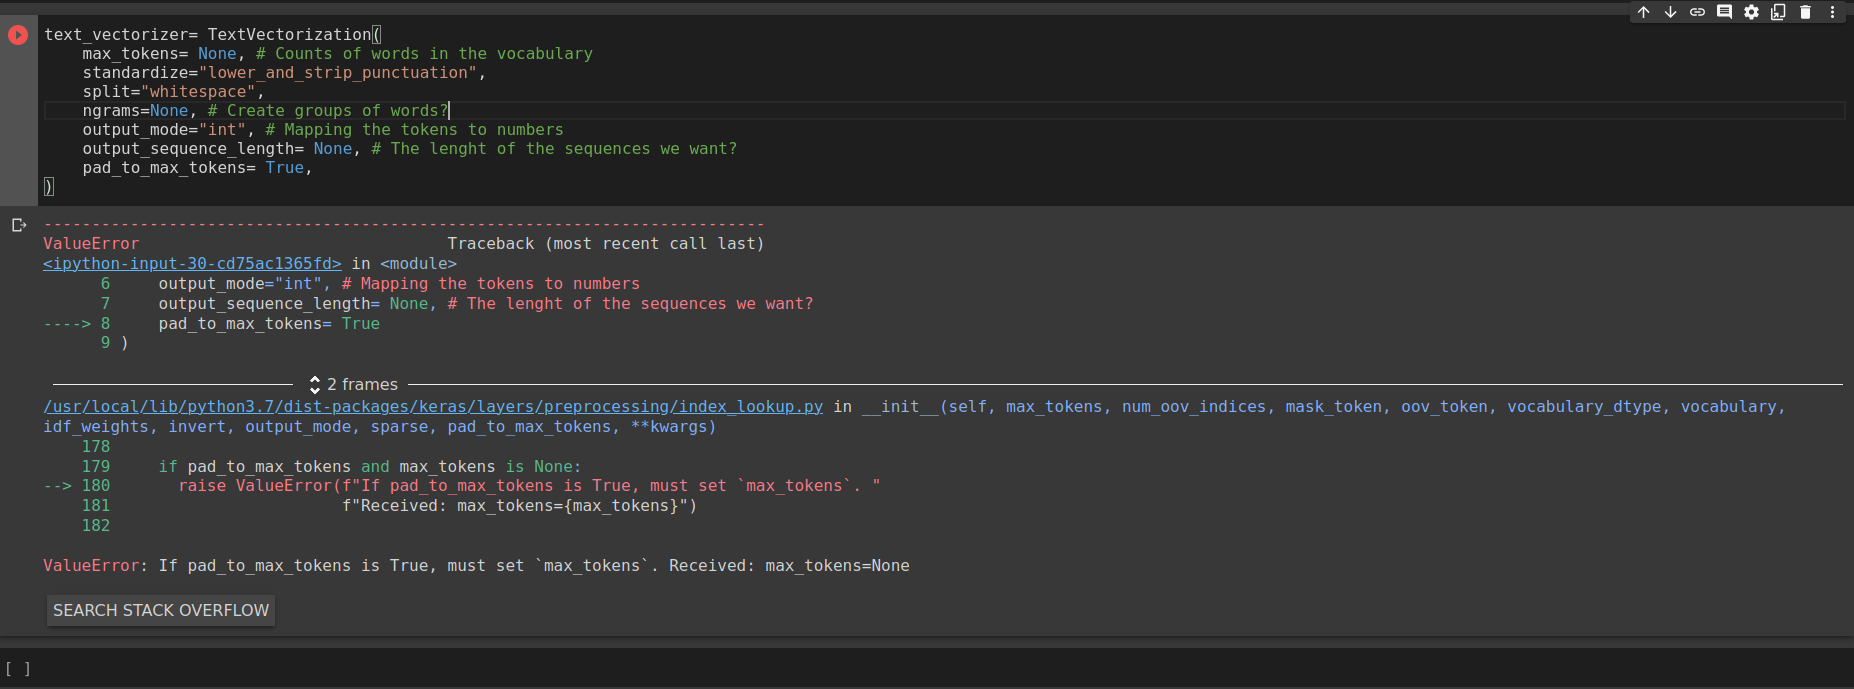

In [21]:
text_vectorizer= TextVectorization(
    max_tokens= 10000, # Counts of words in the vocabulary
    standardize="lower_and_strip_punctuation",  
    split="whitespace", 
    ngrams=None, # Create groups of words?
    output_mode="int", # Mapping the tokens to numbers
    output_sequence_length= None, # The lenght of the sequences we want?
    pad_to_max_tokens= True,
)

In [22]:
text_vectorizer

### Average number of tokens(words) in the training tweets

In [23]:
avg= round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))
avg

15

In [24]:
max_vocab_length= 10000 # Max. number of words to have in our vocabulary
max_length= avg # Max. length our sequences will be.

text_vectorizer= TextVectorization(
    max_tokens= max_vocab_length,
    output_mode= "int",
    output_sequence_length= max_length,
)

## Mapping `TextVectorization` to text data and turning it into numbers

In [25]:
train_sentences

array(["RT @GreenHarvard: Documenting climate change's first major casualty http://t.co/4q4zd7oU34 via @GreenHarvard",
       '#Colorado #News Motorcyclist bicyclist injured in Denver collision on Broadway: At least two people were tak... http://t.co/2iAFPmqJeP',
       "Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were... http://t.co/VAZpG0ftmU",
       ...,
       "'the fallacy is it is up to the steam roller. It's up to the object whether it will be flattened or not.' #RobertCalifornia #thereisonlysex",
       'The Pak terrorist who has been caught alive must be tried fast not delayed as KasabWe must send very hard message to Pak instead of Biryani',
       "For those that were interested in the gun powder art discussed at the end of 'Introduction to Theological Aesthetic' http://t.co/BZ3iR4GMWj"],
      dtype=object)

In [26]:
text_vectorizer.adapt(train_sentences)

## Sample Sentence and tokenize it

In [27]:
sample_sentence= 'There is a hurrican coming towards my city'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  76,    9,    3,    1,  222, 2644,   13,  185,    0,    0,    0,
           0,    0,    0,    0]])>

## Choosing random sentences from training data

In [28]:
random_sentence= random.choice(train_sentences)
print(f"Original: {random_sentence}\n")
vectorized_sentence= text_vectorizer([random_sentence])
print(f"Vectorized: {vectorized_sentence}")

Original: I'm liable to sound like a wounded animal during sex if the ?? is good lol

Vectorized: [[  33 5216    5  618   25    3  252 1342  226 1038   46    2    9  140
   157]]


## Unique words in the vocabulary

In [29]:
common_words= text_vectorizer.get_vocabulary()
common_words

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'are',
 'be',
 'was',
 'have',
 'like',
 'me',
 'up',
 'but',
 'so',
 'just',
 'as',
 'amp',
 'im',
 'not',
 'your',
 'out',
 'its',
 'after',
 'an',
 'will',
 'all',
 'no',
 'fire',
 'has',
 'when',
 'if',
 'we',
 'get',
 'now',
 'new',
 'via',
 'more',
 'or',
 'about',
 'they',
 'people',
 'dont',
 'what',
 'news',
 'he',
 'over',
 'one',
 'how',
 'been',
 'who',
 'into',
 'were',
 'can',
 'video',
 'do',
 'us',
 'emergency',
 '2',
 'disaster',
 'than',
 'there',
 'would',
 'police',
 'his',
 'her',
 'still',
 'some',
 'burning',
 'body',
 'back',
 'off',
 'california',
 'crash',
 'buildings',
 'why',
 'storm',
 'day',
 'time',
 'know',
 'man',
 'them',
 'suicide',
 'rt',
 'going',
 'had',
 'got',
 'first',
 'see',
 'nuclear',
 'world',
 'two',
 'our',
 'cant',
 'bomb',
 '3',
 'fires',
 'youtube',
 'attack',
 'love',
 'go',
 'd

In [30]:
len(common_words)

10000

### Top 5 Words

In [31]:
common_words[:5]

['', '[UNK]', 'the', 'a', 'in']

### Least 5 Words

In [32]:
common_words[-5:]

['paramedics', 'paraguay', 'paradise', 'parade', 'paracord']

## Creating embedding using an Embedding layer

> Tensorflow Embedding Layer -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

> Embedding layer parameters

* `input_dim` -> Size of the vocabulary
* `output_dim` -> Size of the output embedding vector, Eg: a value of `100`, means each token gets represented by a vector of `100` long.
* `input_length` -> Length of the sequences being passed to the embedding layer.

In [33]:
from tensorflow.keras import layers

embedding= layers.Embedding(input_dim= max_vocab_length, # Input Shape
                            output_dim=128, # Output Shape
                            input_length= max_length # How long is each input
                            )

In [34]:
embedding

In [35]:
random_sentence= random.choice(train_sentences)
print(f"Original: {random_sentence}\n")

embedded= embedding(text_vectorizer([random_sentence]))
embedded

Original: Youth electrocuted in Khulna  | http://t.co/3EnyNdXpPm https://t.co/GQpi7jMKan via @sharethis



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-2.3059845e-02,  4.8748400e-02, -4.9984276e-02, ...,
         -3.2289065e-02, -2.8347541e-02, -3.9497815e-02],
        [-3.9123096e-02,  9.0524554e-07,  3.9986793e-02, ...,
         -9.2719905e-03,  1.6626779e-02,  1.2458764e-02],
        [-5.0438866e-03, -8.0057010e-03,  2.0309817e-02, ...,
          1.5785228e-02,  2.6567366e-02, -4.4187333e-02],
        ...,
        [ 3.3167135e-02,  4.0903393e-02, -1.8996112e-03, ...,
         -1.0720313e-02,  1.3534103e-02, -1.7648712e-03],
        [ 3.3167135e-02,  4.0903393e-02, -1.8996112e-03, ...,
         -1.0720313e-02,  1.3534103e-02, -1.7648712e-03],
        [ 3.3167135e-02,  4.0903393e-02, -1.8996112e-03, ...,
         -1.0720313e-02,  1.3534103e-02, -1.7648712e-03]]], dtype=float32)>

### Single Token's embeddings

In [36]:
embedded[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02305984,  0.0487484 , -0.04998428, -0.04396725, -0.01655976,
        0.04329765, -0.01349328,  0.03679198,  0.0025597 ,  0.02777071,
        0.02472738, -0.00792845, -0.04172163, -0.02451747,  0.03664681,
        0.03027307,  0.02883894, -0.01905894,  0.03812644, -0.03247412,
       -0.02343899, -0.00943435, -0.02845809, -0.01835883,  0.01354513,
       -0.02788327, -0.00816599, -0.04774686,  0.04891068,  0.04715815,
        0.04874745,  0.01345413, -0.03594085, -0.00660483,  0.04741974,
       -0.03764103,  0.04691144, -0.0054387 , -0.04858956, -0.02041074,
       -0.04065663,  0.03198222, -0.01347083, -0.01710976,  0.01834432,
        0.03109569, -0.00107323,  0.04845956,  0.03504335, -0.03183563,
        0.01449103, -0.00836998, -0.04690222,  0.02754996,  0.02713631,
       -0.02539338,  0.00216407,  0.03161541,  0.01370711,  0.04066047,
       -0.04492925,  0.0194834 , -0.04977688,  0.01309404,  0.04705223,
        0.015847

In [37]:
embedded[0][0].shape

TensorShape([128])

In [38]:
random_sentence[0]

'Y'

## Conclusion

> Text vectorization or tokenization is converting words to some numerical format. `Creating an embedding` is just making a straight mapping in numerical format that is learnable by the model.

## Modelling on the text dataset

### Experiments

* Naive Bayes(Baseline), Normal ML model
* Feed-Forward Neural Network(Dense model)
* LSTM model(RNN)
* GRU model(RNN)
* Bidirectional-LSTM model(RNN)
* 1D Convolutional Neural Network(CNN)
* Tensorflow Hub pretrained Feature Extractor(Transfer learning in NLP)
* Transfer Learning but with only 10% of the data

### Modelling steps:

* Create a model
* Build a model
* Fit a model
* Evaluate the model

## Model 0: Naive Bayes Model(Baseline)

> It is a common practice to use non-DL algorithms as a baseline because of their speed and later use DL algorithms to improve upon them.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [40]:
model_0= Pipeline([
    ("tfidf", TfidfVectorizer()), # Converts words into numbers using tfidf
    ("clf", MultinomialNB()) # Model the text
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Evaluate the model

In [41]:
baseline_score= model_0.score(val_sentences, val_labels)
print(f"The score of the naive bayes model: {baseline_score}")

The score of the naive bayes model: 0.8333333333333334


### Making predictions

In [42]:
baseline_preds= model_0.predict(val_sentences)
baseline_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [43]:
train_labels

array([1, 1, 1, ..., 0, 1, 0])

#### Predicting the model

In [44]:
from helper_functions import calculate_results, make_confusion_matrix

In [45]:
baseline_result= calculate_results(val_labels, baseline_preds)
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

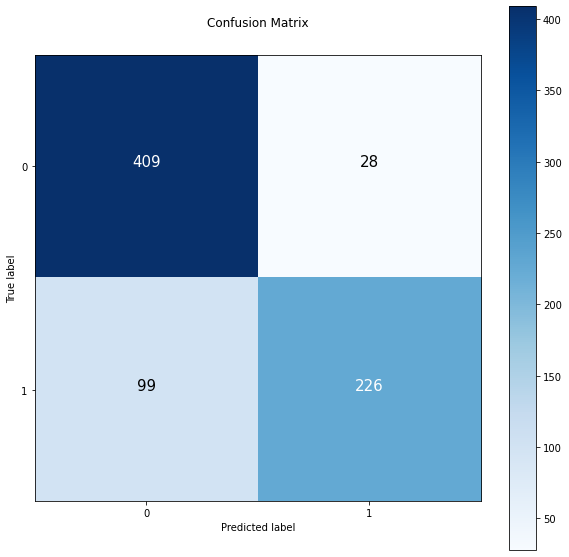

In [46]:
make_confusion_matrix(val_labels, baseline_preds)

In [47]:
409 + 28

437

In [48]:
99 + 206

305

## Model 1: A simple Dense Model

### Tensorflow Callback

In [49]:
from helper_functions import create_tensorboard_callback

SAVE_DIR='model_logs'

### Model Building

In [50]:
from tensorflow.keras import layers
inputs= layers.Input(shape=(1,), dtype= tf.string) # Inputs are 1-dimensional string
x= text_vectorizer(inputs) # Converting the string into numbers
x= embedding(x) # Create an embedding of the numberized inputs
x= layers.GlobalAveragePooling1D(name="global_avrage_pooling")(x) # Condense the feature vector for each token to one vector
outputs= layers.Dense(1, activation="sigmoid")(x) # Create an output layer, and it is a binary classification model
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense")

In [51]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avrage_pooling (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [52]:
model_1.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer= tf.keras.optimizers.Adam())

In [53]:
history_1 = model_1.fit(train_sentences,
                        train_labels, 
                        epochs=10,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220821-125134
Epoch 1/10
215/215 [==============================] - 5s 18ms/step - loss: 0.6161 - accuracy: 0.6859 - val_loss: 0.5122 - val_accuracy: 0.7992
Epoch 2/10
215/215 [==============================] - 4s 18ms/step - loss: 0.4459 - accuracy: 0.8181 - val_loss: 0.4317 - val_accuracy: 0.8241
Epoch 3/10
215/215 [==============================] - 5s 25ms/step - loss: 0.3507 - accuracy: 0.8593 - val_loss: 0.4197 - val_accuracy: 0.8360
Epoch 4/10
215/215 [==============================] - 6s 26ms/step - loss: 0.2870 - accuracy: 0.8913 - val_loss: 0.4273 - val_accuracy: 0.8373
Epoch 5/10
215/215 [==============================] - 6s 27ms/step - loss: 0.2397 - accuracy: 0.9091 - val_loss: 0.4444 - val_accuracy: 0.8268
Epoch 6/10
215/215 [==============================] - 6s 28ms/step - loss: 0.2018 - accuracy: 0.9261 - val_loss: 0.4745 - val_accuracy: 0.8255
Epoch 7/10
215/215 [==============================] - 6s 27ms/step -

In [54]:
model_1_score=model_1.evaluate(val_sentences, val_labels)
model_1_score

24/24 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.8045


[0.6031972169876099, 0.8044619560241699]

In [55]:
baseline_score

0.8333333333333334

In [56]:
model_1_pred_probs= model_1.predict(val_sentences)
model_1_pred_probs.shape

(762, 1)

In [57]:
model_1_pred_probs[:5]

array([[9.9996781e-01],
       [8.7494701e-02],
       [4.4163823e-02],
       [8.7450314e-01],
       [3.9299470e-05]], dtype=float32)

### Converting model prediction probabilites to label format

In [58]:
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)>

In [59]:
val_labels[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

### Evaluating the model

In [60]:
model_1_results= calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 80.4461942257218,
 'precision': 0.8037585988026007,
 'recall': 0.8044619422572179,
 'f1': 0.8035982174851807}

In [61]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

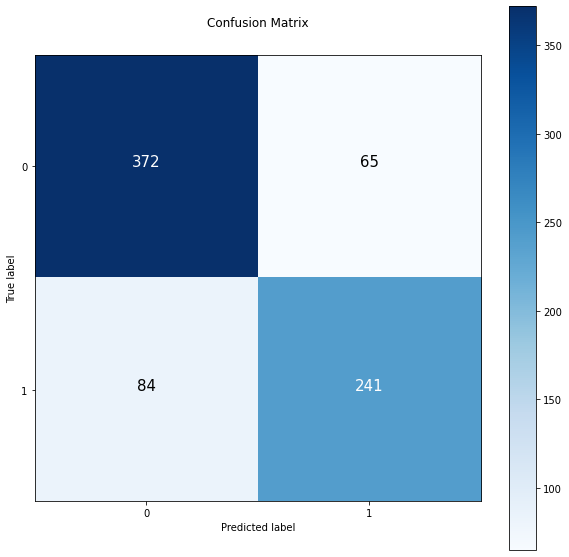

In [62]:
make_confusion_matrix(val_labels, model_1_preds)

## Visualizing learned embeddings

In [63]:
words_in_vocab= text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [64]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avrage_pooling (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

### Weight matrix of embedding layer

> These are the numerical representation of each token in the training data, which have been learning from the ~10 epochs of the model.

In [65]:
embed_weights= model_1.get_layer('embedding').get_weights()
embed_weights

[array([[ 0.0459025 ,  0.05333335,  0.01131363, ..., -0.02305843,
          0.02644347, -0.014403  ],
        [-0.03856026,  0.0428007 ,  0.0278493 , ...,  0.03774559,
         -0.03626027,  0.03507503],
        [-0.01937704,  0.00402977, -0.015742  , ..., -0.06378987,
          0.02399367, -0.06063085],
        ...,
        [ 0.05004337,  0.10425019,  0.09489587, ..., -0.06502605,
          0.03893399, -0.05677646],
        [ 0.0401124 ,  0.00445999,  0.01924937, ..., -0.0334311 ,
          0.03057611,  0.04465398],
        [ 0.02364768,  0.04585435,  0.01928393, ...,  0.00706746,
          0.05493109, -0.06673662]], dtype=float32)]

In [66]:
embed_weights[0]

array([[ 0.0459025 ,  0.05333335,  0.01131363, ..., -0.02305843,
         0.02644347, -0.014403  ],
       [-0.03856026,  0.0428007 ,  0.0278493 , ...,  0.03774559,
        -0.03626027,  0.03507503],
       [-0.01937704,  0.00402977, -0.015742  , ..., -0.06378987,
         0.02399367, -0.06063085],
       ...,
       [ 0.05004337,  0.10425019,  0.09489587, ..., -0.06502605,
         0.03893399, -0.05677646],
       [ 0.0401124 ,  0.00445999,  0.01924937, ..., -0.0334311 ,
         0.03057611,  0.04465398],
       [ 0.02364768,  0.04585435,  0.01928393, ...,  0.00706746,
         0.05493109, -0.06673662]], dtype=float32)

In [67]:
embed_weights= model_1.get_layer('embedding').get_weights()[0]
embed_weights

array([[ 0.0459025 ,  0.05333335,  0.01131363, ..., -0.02305843,
         0.02644347, -0.014403  ],
       [-0.03856026,  0.0428007 ,  0.0278493 , ...,  0.03774559,
        -0.03626027,  0.03507503],
       [-0.01937704,  0.00402977, -0.015742  , ..., -0.06378987,
         0.02399367, -0.06063085],
       ...,
       [ 0.05004337,  0.10425019,  0.09489587, ..., -0.06502605,
         0.03893399, -0.05677646],
       [ 0.0401124 ,  0.00445999,  0.01924937, ..., -0.0334311 ,
         0.03057611,  0.04465398],
       [ 0.02364768,  0.04585435,  0.01928393, ...,  0.00706746,
         0.05493109, -0.06673662]], dtype=float32)

In [68]:
embed_weights[0].shape

(128,)

### Tensorflow Word Embedding Visualization

* Tensorflow Projector -> https://projector.tensorflow.org/
* Tensorflow Word Embeddings Docs -> https://www.tensorflow.org/text/guide/word_embeddings

#### Embedding Files

In [69]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()


### Downloading files from colab to upload to projector

In [70]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network(RNN)

> RNN are useful for sequence data.

> The premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input.

### Resources

* Link -> https://github.com/mrdbourke/tensorflow-deep-learning#-08-introduction-to-nlp-natural-language-processing-in-tensorflow-exercises

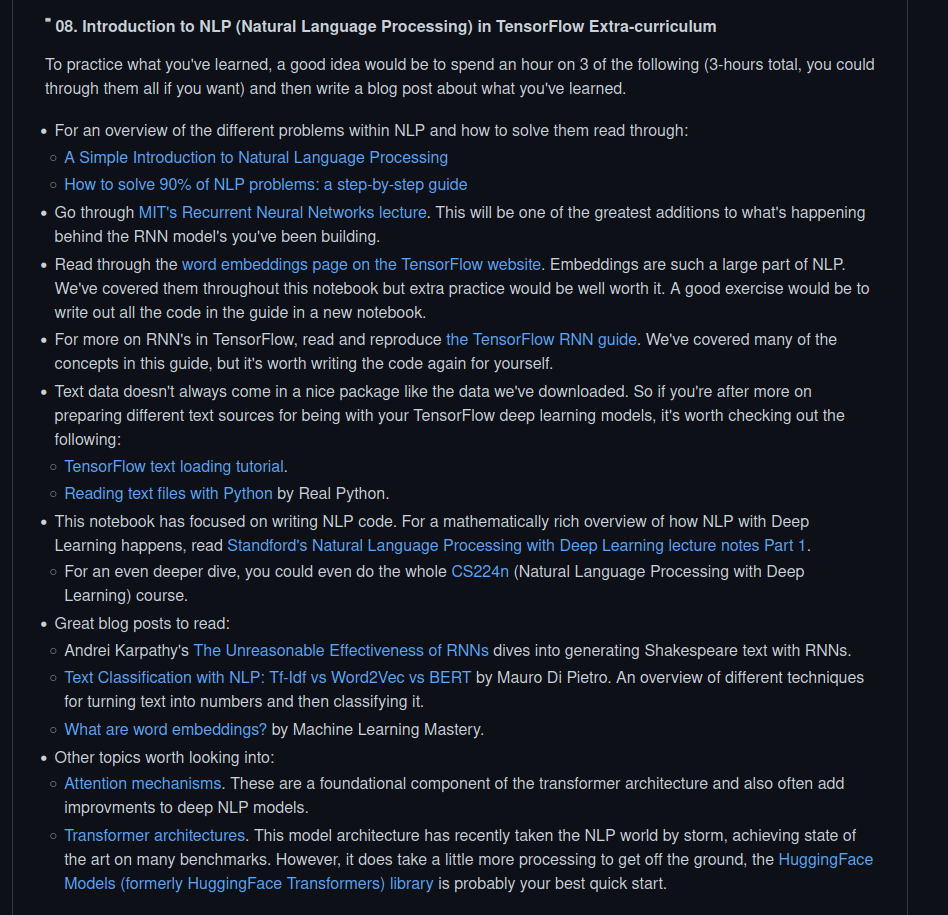

## Model 2: LSTM(RNN)

* LSTM: `Long Short Term Memory`


### Typical Structure of an RNN:

``` 
Input(text) -> Tokenize(text_vectorizer) -> Embedding(Embedding Layer) -> Layers(RNNs/Dense) -> Output(Label probability)

```

### LSTM Model

In [71]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.LSTM(64, return_sequences=True)(x) # When we're stacking RNN cells together, we need to set 'return_sequences' parameter to 'True', `return_sequences=True`, otherwise we will get an error.
x= layers.LSTM(64)(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_2= tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [72]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

### Compile the model

In [73]:
model_2.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [74]:
### Fit the model

In [75]:
history_2= model_2.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220821-125228
Epoch 1/10
215/215 [==============================] - 13s 42ms/step - loss: 0.1438 - accuracy: 0.9540 - val_loss: 0.6942 - val_accuracy: 0.7953
Epoch 2/10
215/215 [==============================] - 8s 38ms/step - loss: 0.0892 - accuracy: 0.9658 - val_loss: 0.8852 - val_accuracy: 0.7769
Epoch 3/10
215/215 [==============================] - 8s 39ms/step - loss: 0.0798 - accuracy: 0.9714 - val_loss: 0.7925 - val_accuracy: 0.7730
Epoch 4/10
215/215 [==============================] - 12s 57ms/step - loss: 0.0706 - accuracy: 0.9711 - val_loss: 1.0731 - val_accuracy: 0.7559
Epoch 5/10
215/215 [==============================] - 8s 38ms/step - loss: 0.0606 - accuracy: 0.9718 - val_loss: 1.4931 - val_accuracy: 0.7808
Epoch 6/10
215/215 [==============================] - 8s 36ms/step - loss: 0.0577 - accuracy: 0.9756 - val_loss: 1.2852 - val_accuracy: 0.7730
Epoch 7/10
215/215 [==============================] - 8s 38ms/step 

### Prediction Probabilities

In [76]:
model_2_pred_probs= model_2.predict(val_sentences)
model_2_pred_probs[:5]

array([[9.9999952e-01],
       [1.2016714e-02],
       [1.4319122e-03],
       [9.9997354e-01],
       [5.4994698e-06]], dtype=float32)

In [77]:
val_labels

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [78]:
model_2_preds= tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1

In [79]:
model_2_results= calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7655544493719895,
 'recall': 0.7624671916010499,
 'f1': 0.7633161703548151}

In [80]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

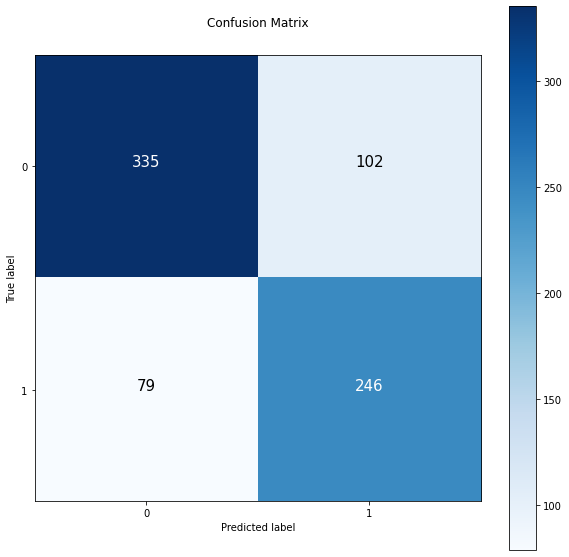

In [81]:
make_confusion_matrix(val_labels,model_2_preds)

## Model 3: GRU(RNN)

* GRU -> Gated Recurrent Unit

* Docs -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU

In [82]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.GRU(64, return_sequences=True)(x) 
x= layers.GRU(64)(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_3= tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [83]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                       

In [84]:
model_3.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_3= model_3.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220821-125400
Epoch 1/10
215/215 [==============================] - 13s 39ms/step - loss: 0.1200 - accuracy: 0.9616 - val_loss: 0.8094 - val_accuracy: 0.7677
Epoch 2/10
215/215 [==============================] - 8s 36ms/step - loss: 0.0616 - accuracy: 0.9756 - val_loss: 0.9798 - val_accuracy: 0.7835
Epoch 3/10
215/215 [==============================] - 8s 36ms/step - loss: 0.0461 - accuracy: 0.9787 - val_loss: 1.5484 - val_accuracy: 0.7743
Epoch 4/10
215/215 [==============================] - 8s 35ms/step - loss: 0.0413 - accuracy: 0.9794 - val_loss: 1.8361 - val_accuracy: 0.7651
Epoch 5/10
215/215 [==============================] - 8s 36ms/step - loss: 0.0403 - accuracy: 0.9788 - val_loss: 1.3433 - val_accuracy: 0.7782
Epoch 6/10
215/215 [==============================] - 8s 35ms/step - loss: 0.0399 - accuracy: 0.9791 - val_loss: 1.7907 - val_accuracy: 0.7585
Epoch 7/10
215/215 [==============================] - 8s 38ms/step - 

In [85]:
model_3_pred_probs= model_3.predict(val_sentences)
model_3_pred_probs[:5]

array([[9.9999321e-01],
       [1.0131001e-03],
       [6.1312318e-04],
       [9.9992383e-01],
       [9.1158763e-05]], dtype=float32)

In [86]:
model_3_preds= tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1

In [87]:
model_3_results= calculate_results(val_labels,model_3_preds)
model_3_results

{'accuracy': 75.8530183727034,
 'precision': 0.7580219166986261,
 'recall': 0.7585301837270341,
 'f1': 0.7582285168899342}

In [88]:
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7655544493719895,
 'recall': 0.7624671916010499,
 'f1': 0.7633161703548151}

In [89]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

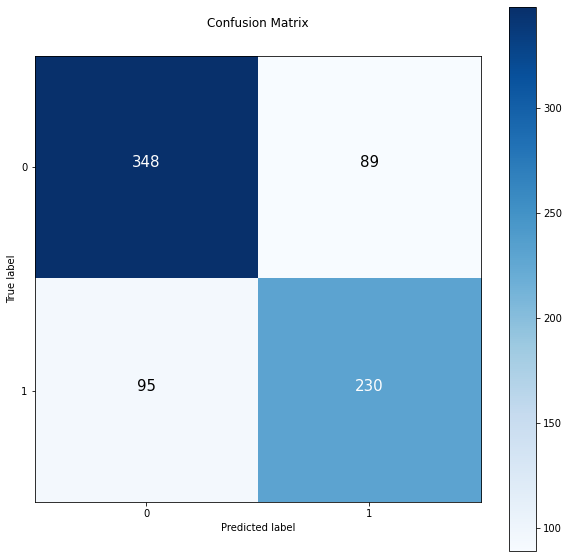

In [90]:
make_confusion_matrix(val_labels,model_3_preds)

### Model 3_1: GRU(RNN)

In [91]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.GRU(64, return_sequences=True)(x) 
x= layers.LSTM(64, return_sequences=True)(x) 
x= layers.LSTM(64, return_sequences=True)(x) 
x= layers.GRU(64)(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_3_1= tf.keras.Model(inputs, outputs, name="model_3_1_GRU")

In [92]:
model_3_1.summary()

Model: "model_3_1_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 15, 64)            33024     
                                                     

In [93]:
model_3_1.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_3_1= model_3_1.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_1_GRU")])

Saving TensorBoard log files to: model_logs/model_3_1_GRU/20220821-125528
Epoch 1/10
215/215 [==============================] - 21s 64ms/step - loss: 0.1017 - accuracy: 0.9628 - val_loss: 1.4227 - val_accuracy: 0.7480
Epoch 2/10
215/215 [==============================] - 12s 56ms/step - loss: 0.0463 - accuracy: 0.9797 - val_loss: 1.1058 - val_accuracy: 0.7375
Epoch 3/10
215/215 [==============================] - 12s 56ms/step - loss: 0.0462 - accuracy: 0.9791 - val_loss: 1.4049 - val_accuracy: 0.7651
Epoch 4/10
215/215 [==============================] - 13s 60ms/step - loss: 0.0384 - accuracy: 0.9803 - val_loss: 1.4576 - val_accuracy: 0.7520
Epoch 5/10
215/215 [==============================] - 12s 56ms/step - loss: 0.0368 - accuracy: 0.9809 - val_loss: 1.5284 - val_accuracy: 0.7638
Epoch 6/10
215/215 [==============================] - 12s 56ms/step - loss: 0.0331 - accuracy: 0.9815 - val_loss: 2.0373 - val_accuracy: 0.7507
Epoch 7/10
215/215 [==============================] - 12s 56ms

In [94]:
model_3_1_pred_probs= model_3_1.predict(val_sentences)
model_3_1_pred_probs[:5]

array([[9.99954820e-01],
       [4.88519669e-04],
       [2.57164240e-04],
       [9.97905254e-01],
       [1.14447255e-04]], dtype=float32)

In [95]:
model_3_1_preds= tf.squeeze(tf.round(model_3_1_pred_probs))
model_3_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

In [96]:
model_3_1_results= calculate_results(val_labels,model_3_1_preds)
model_3_1_results

{'accuracy': 77.42782152230971,
 'precision': 0.7732331928061831,
 'recall': 0.7742782152230971,
 'f1': 0.7730956276763176}

In [97]:
model_3_results

{'accuracy': 75.8530183727034,
 'precision': 0.7580219166986261,
 'recall': 0.7585301837270341,
 'f1': 0.7582285168899342}

In [98]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

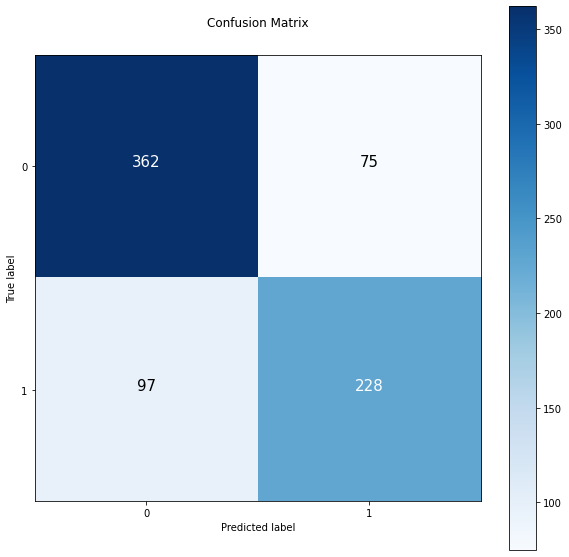

In [99]:
make_confusion_matrix(val_labels,model_3_1_preds)

## Model 4: Bidirectional LSTM(RNN)

> Normal RNN's go from left to right(Like we read an English sentence from left to right), however, a bidirectional RNN goes from right to left as well as lef to right.

* Docs -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional

In [100]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x) 
x= layers.Bidirectional(layers.GRU(64))(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_4= tf.keras.Model(inputs, outputs, name="model_4_Bidirectional_GRU")

In [101]:
model_4.summary()

Model: "model_4_Bidirectional_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          74496     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                         

In [102]:
model_4.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_4= model_4.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional_gru")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional_gru/20220821-125800
Epoch 1/10
215/215 [==============================] - 27s 90ms/step - loss: 0.0825 - accuracy: 0.9701 - val_loss: 1.4946 - val_accuracy: 0.7677
Epoch 2/10
215/215 [==============================] - 11s 52ms/step - loss: 0.0407 - accuracy: 0.9794 - val_loss: 1.7354 - val_accuracy: 0.7769
Epoch 3/10
215/215 [==============================] - 12s 55ms/step - loss: 0.0343 - accuracy: 0.9818 - val_loss: 1.9642 - val_accuracy: 0.7533
Epoch 4/10
215/215 [==============================] - 12s 54ms/step - loss: 0.0339 - accuracy: 0.9818 - val_loss: 2.2267 - val_accuracy: 0.7467
Epoch 5/10
215/215 [==============================] - 12s 54ms/step - loss: 0.0344 - accuracy: 0.9810 - val_loss: 1.7015 - val_accuracy: 0.7454
Epoch 6/10
215/215 [==============================] - 11s 53ms/step - loss: 0.0350 - accuracy: 0.9816 - val_loss: 2.5167 - val_accuracy: 0.7415
Epoch 7/10
215/215 [==============================

In [103]:
model_4_pred_probs= model_4.predict(val_sentences)
model_4_preds= tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1

In [104]:
model_4_results= calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 75.59055118110236,
 'precision': 0.7557199298831273,
 'recall': 0.7559055118110236,
 'f1': 0.7558074694620556}

In [105]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

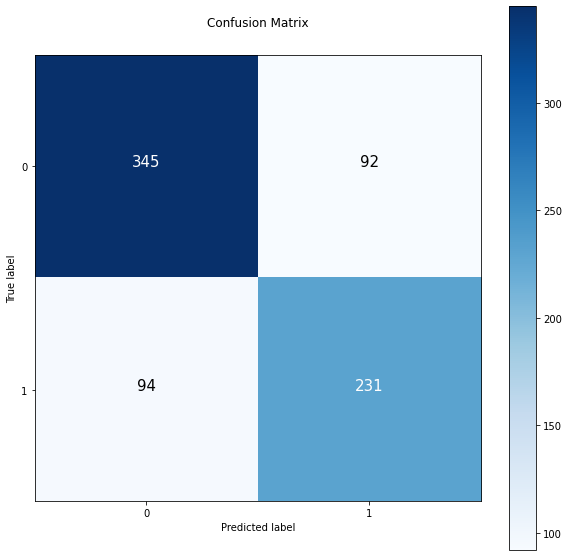

In [106]:
make_confusion_matrix(val_labels,model_4_preds)

### Model 4_1: Bidirectional LSTM(RNN)

In [107]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x= layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) 
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x= layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)  
x= layers.Bidirectional(layers.LSTM(64))(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_4_1= tf.keras.Model(inputs, outputs, name="model_4_Bidirectional_LSTM")

In [108]:
model_4_1.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 15, 128)          98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 15, 128)          74496     
 nal)                                                            
                                        

In [109]:
model_4_1.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_4_1= model_4_1.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional_lstm")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional_lstm/20220821-130020
Epoch 1/10
215/215 [==============================] - 37s 105ms/step - loss: 0.0758 - accuracy: 0.9743 - val_loss: 1.0293 - val_accuracy: 0.7546
Epoch 2/10
215/215 [==============================] - 20s 92ms/step - loss: 0.0405 - accuracy: 0.9807 - val_loss: 1.4204 - val_accuracy: 0.7572
Epoch 3/10
215/215 [==============================] - 20s 92ms/step - loss: 0.0362 - accuracy: 0.9813 - val_loss: 1.6470 - val_accuracy: 0.7585
Epoch 4/10
215/215 [==============================] - 20s 94ms/step - loss: 0.0316 - accuracy: 0.9828 - val_loss: 2.6133 - val_accuracy: 0.7270
Epoch 5/10
215/215 [==============================] - 20s 91ms/step - loss: 0.0374 - accuracy: 0.9818 - val_loss: 1.8005 - val_accuracy: 0.7612
Epoch 6/10
215/215 [==============================] - 20s 92ms/step - loss: 0.0395 - accuracy: 0.9801 - val_loss: 1.8456 - val_accuracy: 0.7493
Epoch 7/10
215/215 [============================

In [110]:
model_4_1_pred_probs= model_4_1.predict(val_sentences)
model_4_1_preds= tf.squeeze(tf.round(model_4_1_pred_probs))
model_4_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [111]:
model_4_1_results= calculate_results(val_labels,model_4_1_preds)
model_4_1_results

{'accuracy': 75.45931758530183,
 'precision': 0.7534485890004639,
 'recall': 0.7545931758530183,
 'f1': 0.7536389660964138}

In [112]:
model_3_results

{'accuracy': 75.8530183727034,
 'precision': 0.7580219166986261,
 'recall': 0.7585301837270341,
 'f1': 0.7582285168899342}

In [113]:
model_3_1_results

{'accuracy': 77.42782152230971,
 'precision': 0.7732331928061831,
 'recall': 0.7742782152230971,
 'f1': 0.7730956276763176}

In [114]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

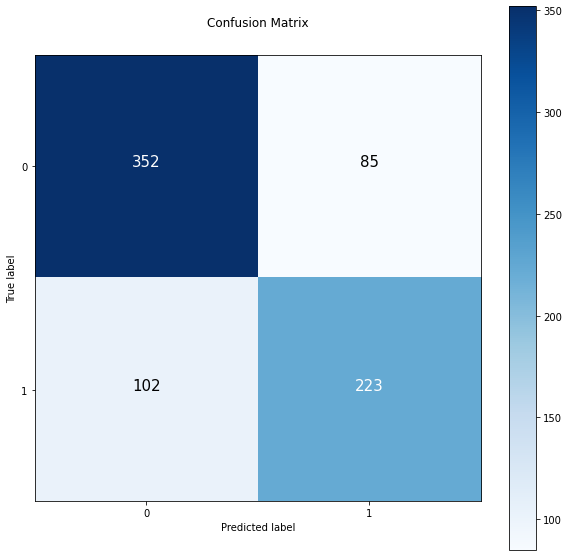

In [115]:
make_confusion_matrix(val_labels,model_4_1_preds)

## Model 5: 1D CNN or 1-dimensional Convolutional Neural Network

* Structure of a Conv1D model of sequences(`Text` here)

* Docs -> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

``` 
Inputs(Text) -> Tokenization -> Embedding -> Layer(Conv1D + Pooling Layer) -> Outputs(Class Probabilities
```

In [117]:
# Test out the embedding, 1D convolutional and max pooling

embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding

conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="valid") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer

max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [118]:
# Test out the embedding, 1D convolutional and max pooling

embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding

conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu", padding="same") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer

max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [119]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00543537, -0.00401944, -0.02896701, ...,  0.00536739,
         -0.01185998,  0.00126648],
        [ 0.02824769, -0.00811694,  0.01945754, ...,  0.01202469,
          0.03162182, -0.03965249],
        [-0.03144765,  0.03669578,  0.02134189, ..., -0.0617751 ,
          0.0002732 ,  0.01024885],
        ...,
        [ 0.02616865,  0.03571809,  0.02698829, ..., -0.02049858,
          0.02111075, -0.00226325],
        [ 0.02616865,  0.03571809,  0.02698829, ..., -0.02049858,
          0.02111075, -0.00226325],
        [ 0.02616865,  0.03571809,  0.02698829, ..., -0.02049858,
          0.02111075, -0.00226325]]], dtype=float32)>

In [120]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         3.91147248e-02, 1.57614239e-02, 7.23488182e-02, 0.00000000e+00,
         4.59446572e-02, 1.42756198e-02, 2.06078403e-02, 4.49588336e-03,
         2.35087033e-02, 3.13506164e-02, 3.31063196e-02, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 7.24695623e-04, 0.00000000e+00,
         2.03828514e-03, 0.00000000e+00, 9.97817367e-02, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.01617926e-02,
         0.00000000e+00, 4.86350991e-02, 0.00000000e+00, 5.74958399e-02],
        [7.90310744e-03, 0.00000000e+00, 6.01280704e-02, 0.00000000e+00,
         0.00000000e+00, 1.48207635e-01, 1.00199059e-01, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 6.27007484e-02, 8.41956120e-03,
         1.73614919e-03, 0.00000000e+00, 0.00000000e+00, 8.05205107e-03,
         0.00000000e+00, 3.41710541e-03, 7.56078213e-02, 4.78061587e-0

In [121]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.07346502, 0.04558655, 0.06012807, 0.08152921, 0.04708419,
        0.14820763, 0.10019906, 0.06228592, 0.11891212, 0.17879415,
        0.07272373, 0.05799871, 0.0996262 , 0.06875537, 0.05870203,
        0.04340137, 0.07420904, 0.00341711, 0.07560782, 0.10751537,
        0.0700969 , 0.0485388 , 0.09978174, 0.08053499, 0.01562495,
        0.01651509, 0.06599217, 0.10312173, 0.07776815, 0.08094688,
        0.07896961, 0.07231513]], dtype=float32)>

### Building Conv1D CNN model

In [122]:
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype="string")
x= text_vectorizer(inputs)
x= embedding(x)
x=layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2)(x)
x=layers.GlobalMaxPooling1D(name="global_max_pooling1D")(x)
x= layers.Dense(64, activation="relu")(x)
outputs= layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5= tf.keras.Model(inputs, outputs, name="model_5_1D_CNN")

In [123]:
model_5.summary()

Model: "model_5_1D_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             41024     
                                                                 
 global_max_pooling1D (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 64)             

In [124]:
model_5.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_5= model_5.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5_1D_CNN")])

Saving TensorBoard log files to: model_logs/model_5_1D_CNN/20220821-131611
Epoch 1/10
215/215 [==============================] - 5s 20ms/step - loss: 0.0994 - accuracy: 0.9645 - val_loss: 1.2411 - val_accuracy: 0.7493
Epoch 2/10
215/215 [==============================] - 4s 20ms/step - loss: 0.0529 - accuracy: 0.9777 - val_loss: 1.3949 - val_accuracy: 0.7546
Epoch 3/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0393 - accuracy: 0.9807 - val_loss: 1.6720 - val_accuracy: 0.7428
Epoch 4/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0336 - accuracy: 0.9820 - val_loss: 1.7295 - val_accuracy: 0.7428
Epoch 5/10
215/215 [==============================] - 4s 18ms/step - loss: 0.0313 - accuracy: 0.9839 - val_loss: 1.8469 - val_accuracy: 0.7283
Epoch 6/10
215/215 [==============================] - 4s 19ms/step - loss: 0.0299 - accuracy: 0.9819 - val_loss: 2.0492 - val_accuracy: 0.7415
Epoch 7/10
215/215 [==============================] - 4s 18ms/step 

In [125]:
model_5_pred_probs= model_5.predict(val_sentences)
model_5_preds= tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [126]:
model_5_results= calculate_results(val_labels,model_5_preds)
model_5_results

{'accuracy': 73.0971128608924,
 'precision': 0.7357380889186603,
 'recall': 0.7309711286089239,
 'f1': 0.7321478425963839}

In [127]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

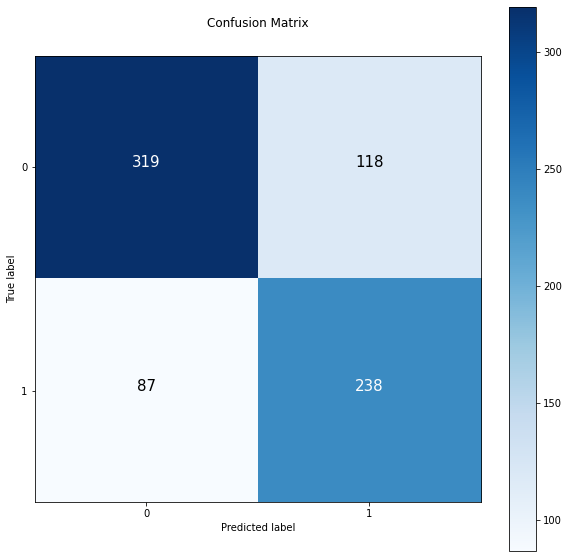

In [129]:
make_confusion_matrix(val_labels,model_5_preds)

## Model 6: Transfer Learning Feature Extractor Model from Tensorflow Hub

### Trying it out

* Model Link -> https://tfhub.dev/google/universal-sentence-encoder/4


In [131]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed(["The quick brown fox jumps over the lazy dog.", "I am a sentence for which I would like to get its embedding"])

print(embeddings)

# The following are example embedding output of 512 dimensions per sentence


tf.Tensor(
[[-0.03133017 -0.06338634 -0.01607501 ... -0.03242778 -0.0457574
   0.05370456]
 [ 0.05080861 -0.01652434  0.01573779 ...  0.00976657  0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [134]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([sample_sentence, "I am using transfer learning feature extraction for NLP problems"])

print(embeddings)

tf.Tensor(
[[ 0.06136243 -0.02120869  0.04246137 ...  0.02193084 -0.0373863
  -0.02841662]
 [ 0.05354223 -0.04637979 -0.03956956 ...  0.04646082 -0.0556365
  -0.06895664]], shape=(2, 512), dtype=float32)


In [135]:
embeddings.shape

TensorShape([2, 512])

In [137]:
embeddings[0].shape

TensorShape([512])

### Creating a Keras Layer using the USE pretrained layer from tensorflow Hub. 

* USE -> Universal Serial Encoder

In [138]:
model_url="https://tfhub.dev/google/universal-sentence-encoder/4"

In [141]:
# input_shape is an empty string because this model has a varibale input length and it will change any length into "512" shape.
sentence_encoder_layer= hub.KerasLayer(model_url, input_shape=[], dtype="string", trainable=False, name="transfer_learning_USE")

In [144]:
model_6= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation="sigmoid")
], name="model_6_USE")


model_6.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [145]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [146]:
history_6= model_6.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE/20220821-134549
Epoch 1/10
215/215 [==============================] - 6s 14ms/step - loss: 0.6501 - accuracy: 0.7303 - val_loss: 0.6054 - val_accuracy: 0.8058
Epoch 2/10
215/215 [==============================] - 2s 11ms/step - loss: 0.5830 - accuracy: 0.7936 - val_loss: 0.5516 - val_accuracy: 0.8018
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.5405 - accuracy: 0.7974 - val_loss: 0.5180 - val_accuracy: 0.7979
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.5119 - accuracy: 0.7984 - val_loss: 0.4953 - val_accuracy: 0.7992
Epoch 5/10
215/215 [==============================] - 2s 11ms/step - loss: 0.4920 - accuracy: 0.7987 - val_loss: 0.4798 - val_accuracy: 0.8045
Epoch 6/10
215/215 [==============================] - 2s 12ms/step - loss: 0.4773 - accuracy: 0.8005 - val_loss: 0.4684 - val_accuracy: 0.8071
Epoch 7/10
215/215 [==============================] 

In [147]:
model_6_pred_probs= model_6.predict(val_sentences)
model_6_preds= tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [148]:
model_6_results= calculate_results(val_labels,model_6_preds)
model_6_results

{'accuracy': 80.70866141732283,
 'precision': 0.8064559638378536,
 'recall': 0.8070866141732284,
 'f1': 0.8065317934469015}

In [149]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

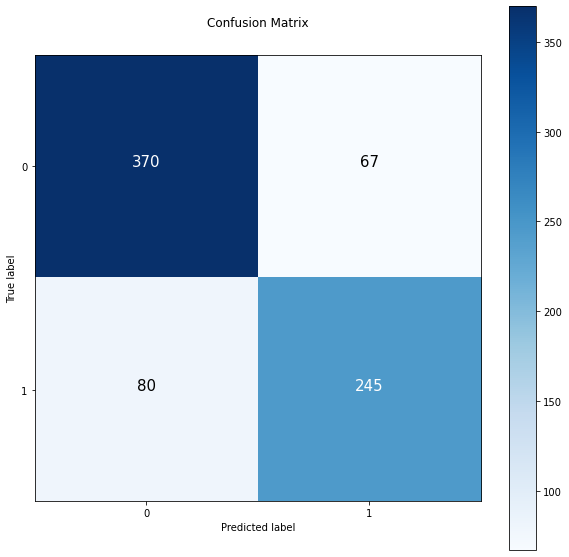

In [150]:
make_confusion_matrix(val_labels,model_6_preds)

## Model 6_1: Transfer Learning Feature Extractor Model from Tensorflow Hub

In [151]:
model_6_1= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_1_USE")


model_6_1.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [152]:
model_6_1.summary()

Model: "model_6_1_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [153]:
history_6_1= model_6_1.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE_1")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE_1/20220821-135128
Epoch 1/10
215/215 [==============================] - 5s 14ms/step - loss: 0.5049 - accuracy: 0.7797 - val_loss: 0.4280 - val_accuracy: 0.8136
Epoch 2/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4170 - accuracy: 0.8155 - val_loss: 0.4112 - val_accuracy: 0.8176
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4030 - accuracy: 0.8227 - val_loss: 0.4075 - val_accuracy: 0.8215
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3953 - accuracy: 0.8270 - val_loss: 0.4054 - val_accuracy: 0.8150
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3881 - accuracy: 0.8288 - val_loss: 0.4011 - val_accuracy: 0.8281
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3823 - accuracy: 0.8301 - val_loss: 0.4002 - val_accuracy: 0.8268
Epoch 7/10
215/215 [==============================

In [154]:
model_6_1_pred_probs= model_6_1.predict(val_sentences)
model_6_1_preds= tf.squeeze(tf.round(model_6_1_pred_probs))
model_6_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [155]:
model_6_1_results= calculate_results(val_labels,model_6_1_preds)
model_6_1_results

{'accuracy': 83.85826771653542,
 'precision': 0.8393014514696475,
 'recall': 0.8385826771653543,
 'f1': 0.8370970955363254}

In [157]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

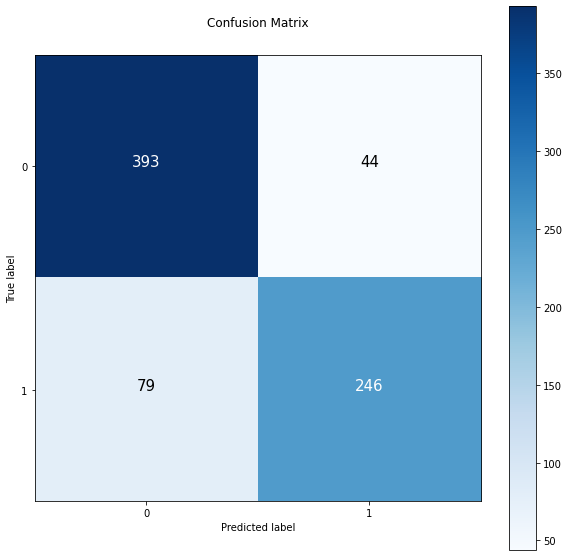

In [158]:
make_confusion_matrix(val_labels,model_6_1_preds)

In [159]:
model_6_2= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_2_USE")


model_6_2.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [160]:
model_6_2.summary()

Model: "model_6_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [161]:
history_6_2= model_6_2.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE_2")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE_2/20220821-135446
Epoch 1/10
215/215 [==============================] - 6s 17ms/step - loss: 0.4896 - accuracy: 0.7884 - val_loss: 0.4239 - val_accuracy: 0.8110
Epoch 2/10
215/215 [==============================] - 3s 13ms/step - loss: 0.4120 - accuracy: 0.8180 - val_loss: 0.4073 - val_accuracy: 0.8241
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3984 - accuracy: 0.8215 - val_loss: 0.4000 - val_accuracy: 0.8241
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3885 - accuracy: 0.8276 - val_loss: 0.4020 - val_accuracy: 0.8320
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3797 - accuracy: 0.8329 - val_loss: 0.4060 - val_accuracy: 0.8320
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3685 - accuracy: 0.8359 - val_loss: 0.3981 - val_accuracy: 0.8307
Epoch 7/10
215/215 [==============================

In [162]:
model_6_2_pred_probs= model_6_2.predict(val_sentences)
model_6_2_preds= tf.squeeze(tf.round(model_6_2_pred_probs))
model_6_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [163]:
model_6_2_results= calculate_results(val_labels,model_6_2_preds)
model_6_2_results

{'accuracy': 83.07086614173228,
 'precision': 0.830882517890392,
 'recall': 0.8307086614173228,
 'f1': 0.8293690055761658}

In [164]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

In [166]:
model_6_3= tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6_3_USE")


model_6_3.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [167]:
model_6_3.summary()

Model: "model_6_3_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transfer_learning_USE (Kera  (None, 512)              256797824 
 sLayer)                                                         
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,834,881
Trainable params: 37,057
Non-trainable params: 256,797,824
_________________________________________________________________


In [168]:
history_6_3= model_6_3.fit(train_sentences, train_labels, epochs=10, validation_data=(val_sentences, val_labels), callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6_transfer_learning_USE_3")])

Saving TensorBoard log files to: model_logs/model_6_transfer_learning_USE_3/20220821-135740
Epoch 1/10
215/215 [==============================] - 5s 14ms/step - loss: 0.4874 - accuracy: 0.7862 - val_loss: 0.4080 - val_accuracy: 0.8202
Epoch 2/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4043 - accuracy: 0.8244 - val_loss: 0.3962 - val_accuracy: 0.8255
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3842 - accuracy: 0.8340 - val_loss: 0.3956 - val_accuracy: 0.8268
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3637 - accuracy: 0.8418 - val_loss: 0.3938 - val_accuracy: 0.8373
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3379 - accuracy: 0.8572 - val_loss: 0.3998 - val_accuracy: 0.8307
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3095 - accuracy: 0.8699 - val_loss: 0.4114 - val_accuracy: 0.8255
Epoch 7/10
215/215 [==============================

In [169]:
model_6_3_pred_probs= model_6_3.predict(val_sentences)
model_6_3_preds= tf.squeeze(tf.round(model_6_3_pred_probs))
model_6_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 1., 0.], dtype=float32)>

In [170]:
model_6_3_results= calculate_results(val_labels,model_6_3_preds)
model_6_3_results

{'accuracy': 81.62729658792651,
 'precision': 0.8174537876390091,
 'recall': 0.8162729658792651,
 'f1': 0.8140060519355419}

In [171]:
baseline_result

{'accuracy': 83.33333333333334,
 'precision': 0.8412202657738648,
 'recall': 0.8333333333333334,
 'f1': 0.8293755882702342}

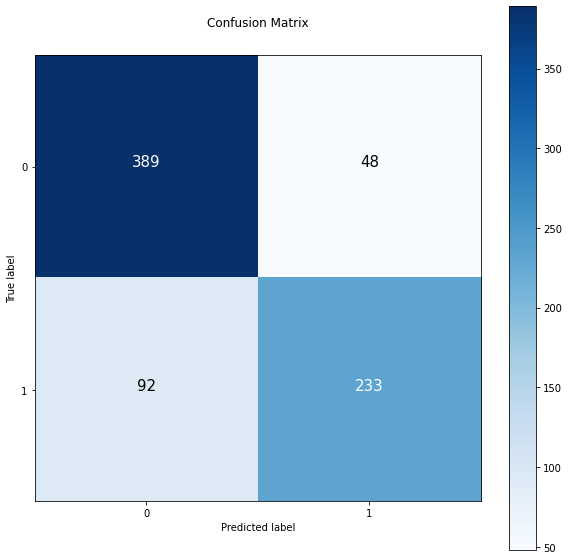

In [173]:
make_confusion_matrix(val_labels,model_6_3_preds)